In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## exploratory data analysis (data preparation)

In [2]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
# !wget $data

In [3]:
df = pd.read_csv('data.csv')

In [4]:
## the DF looks like
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [5]:
## cleaning our data

# Getting format to the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [6]:
# normalize the data of every column with categorical variables
# strings = list(df.dtypes[df.dtypes == 'object'].index)

# for col in strings:
#     print(col)
#     df[col] = df[col].str.lower().str.replace(' ', '_')

## other way to generate the processing
df = df.applymap(
    lambda x: x.lower().replace(' ', '_') if (isinstance(x, str)) else x
)

In [7]:
df.head(3)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])    
    print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


<AxesSubplot:xlabel='msrp', ylabel='Count'>

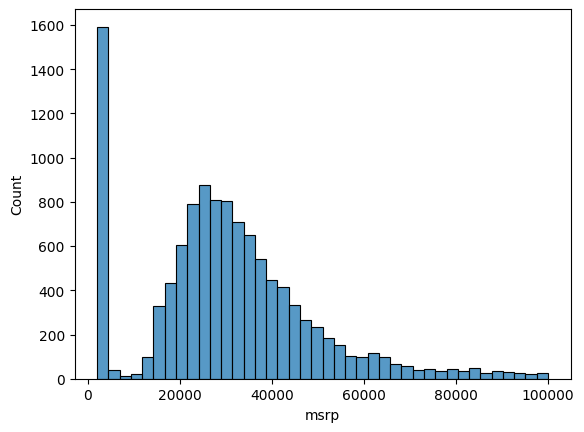

In [9]:
sns.histplot(data=df[df.msrp <= 100000], x='msrp', bins=40)

In [10]:
## lets apply a distribution transformation
# add a one could help to make the log transformatio
np.log1p([0 , 1, 10, 1000, 100000])
# np.log1p([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1]) ## same operation

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [11]:
price_log = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

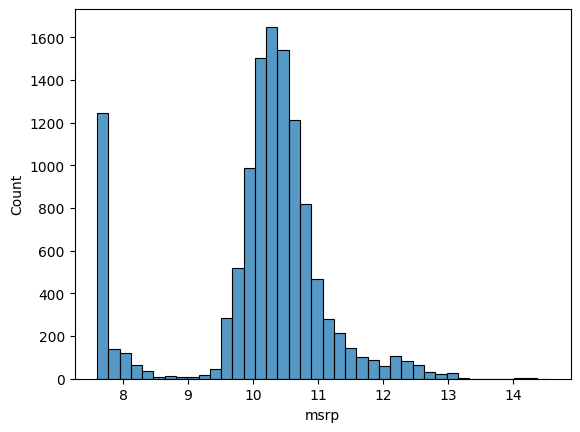

In [12]:
sns.histplot(price_log, bins=40) # almost normal dist

In [13]:
## missing values 
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## setting up the validation framework

In [14]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [15]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [16]:
## plant the seed 
np.random.seed(2)

#get the id numbers
idx = np.arange(n)

# suffle id numbers
np.random.shuffle(idx)

In [17]:
## creating a train, val and test
df_train = df.iloc[idx[:n_train]].copy().reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].copy().reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].copy().reset_index(drop=True)

In [18]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [19]:
## to do not get confussion delete the target variable from the
# features DF to avoid errors
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## linear regression intro

In [20]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [21]:
xi = [453, 11, 86] ## feature matrix of 3 elements 

## creating the weights for the regression
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [22]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred =pred + w[j] * xi[j]

    return pred

In [23]:
linear_regression(xi)

12.312

In [24]:
## remember to backtransform the result to the original data. Remove the log
# with exponential and substract the 1 add to do not have the error of log(0)
np.exp(12.312) - 1 

222347.2221101062

## Linear regression vector form 

In [25]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [26]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [27]:
w_new = [w0] + w

In [28]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [29]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [30]:
linear_regression(xi)

12.312

In [31]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [32]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [33]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [34]:
def linear_regression(X):
    return X.dot(w_new)

In [35]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## training a linear regression

In [36]:
X = [
    [148, 24, 1385], 
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [37]:
# ones = np.ones(X.shape[0])

In [38]:
# X = np.column_stack([ones, X])

In [39]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [40]:
# XTX = X.T.dot(X)
# XTX_inv = np.linalg.inv(XTX)

In [41]:
# w_full = XTX_inv.dot(X.T).dot(y)

In [42]:
# w0 = w_full[0]
# w = w_full[1:]
# w0, w

In [43]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [44]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

## car price baseline model

In [45]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [46]:
## extracting numerical values
base = [
    'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'
]
X_train = df_train[base].fillna(0).values

In [47]:
w0, w = train_linear_regression(X_train, y_train)

In [48]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

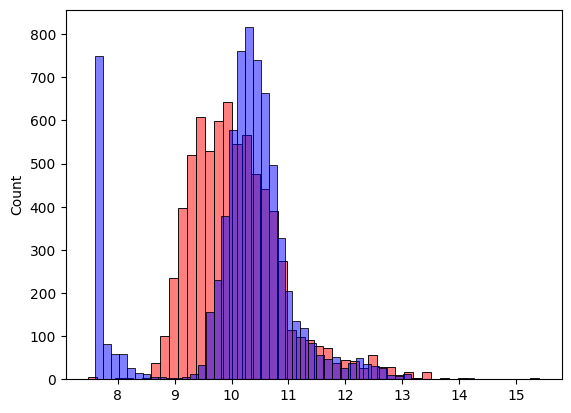

In [49]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

## RMSE and validation a model

In [50]:
def rmse(y, y_pred):    
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [51]:
rmse(y_train, y_pred)

0.7554192603920132

In [52]:
## extracting numerical values
base = [
    'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'
]
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [53]:
def prepare_X(df):
    df_num = df[base].copy()
    df_num = df_num.fillna(0)
    X= df_num.values
    return X

In [54]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

## Simple feature engineering

In [55]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [56]:
## giving a better improvement at the time to add new features
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

<AxesSubplot:ylabel='Count'>

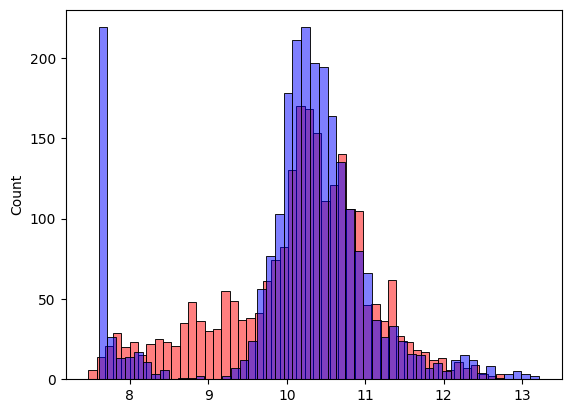

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

## categorical varibales

In [58]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [59]:
## giving a better improvement at the time to add new features
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502353

In [60]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    
    makes = list(df.make.value_counts().head().index)

    for v in makes:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [61]:
## giving a better improvement at the time to add new features
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557035

In [62]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    categorical_variables = [
        'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
        'market_category', 'vehicle_size', 'vehicle_style'
    ]
    categories = {}

    for c in categorical_variables:
        categories[c] = list(df[c].value_counts().head().index)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype(int)
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [63]:
## giving a better improvement at the time to add new features
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

11.968421232506484